# Homework 2
#### Matthew Jacobs

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

bright = [(68,119,170), (102,204,238), (34, 136, 51), (204,187,68), (238,102,119), (170,51,119), (187,187,187)]    
for i in range(len(bright)):    
    r, g, b = bright[i]    
    bright[i] = (r / 255., g / 255., b / 255.)     
highc = [(255,255,255), (221,170,51), (187, 85, 102), (0,68,136), (0,0,0)]    
for i in range(len(highc)):    
    r, g, b = highc[i]    
    highc[i] = (r / 255., g / 255., b / 255.)    
vibrant =  [(0,119,187), (51,187,238), (0, 153, 136), (238,119,51), (204,51,17), (238,51,119), (187,187,187)]   
for i in range(len(vibrant)):    
    r, g, b = vibrant[i]    
    vibrant[i] = (r / 255., g / 255., b / 255.)    
muted =  [(51,34,136), (136,204,238), (68, 170, 153), (17,119,51), (153,153,51), (221,204,119), (204,102,119), (136,34,85), (170, 68, 153), (221,221,221)]  
for i in range(len(muted)):    
    r, g, b = muted[i]    
    muted[i] = (r / 255., g / 255., b / 255.)    
light = [(119,170,221), (153, 221, 255), (68,187,153), (187,204,51), (170,170,0), (238,221,136), (238,136,102), (255,170,187),(221,221,221)]
for i in range(len(light)):    
    r, g, b = light[i]    
    light[i] = (r / 255., g / 255., b / 255.)   
basic =[(0,119,187),(17,119,51),(204,51,17),(85,85,85)]    
for i in range(len(basic)):    
    r, g, b = basic[i]    
    basic[i] = (r / 255., g / 255., b / 255.)
greys = [(255./4. * 3., 255./4.*3., 255./4.*3.), (255./4. * 2., 255./4.*2., 255./4.*2. ), (255./4., 255./4., 255./4. )]
for i in range(len(greys)):    
    r, g, b = greys[i]    
    greys[i] = (r / 255., g / 255., b / 255.)

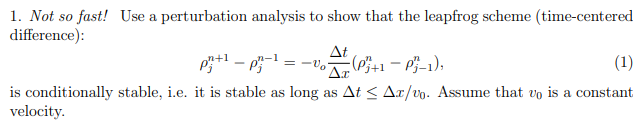

As we derived in class, the perturbation parameter ${\xi}$ tells us whether it is stable or not. If $||{\xi}||$) > 1, perturbation grows with time and is conditionally unstable. We are looking for when $||{\xi}||$) < 1

In [141]:
#Let's define the function for determining xi, in terms of our variables above and the derivation from class
def xi(v0,dt,dx,theta):
    xi = (1 + (v0**2 * dt**2)/(dx**2) * np.sin(theta)**2)**(1/2)
    return xi

In [142]:
#Initial conditions, and defining some useful variables to test our function
x = np.linspace(0,2,200)
t = np.linspace(0,2,200)
#setting a constant velocity, 1 for simplicity
v0 = 1
dx = x[1]-x[0]
dt = t[1]-t[0]
#creating an array of phases
theta = np.array([0,np.pi*2,np.pi,3*np.pi/2,2*np.pi])

xiTest = xi(v0,dt,dx,theta)
#Upon printing this, it returns an array for the xi value of all phases
#for these parameters, it is always less than 1, meaning it is stable

In [143]:
#To answer this question further, we need to find where this stability breaks down
#I will fix dx and sample varying values for dt around that, and compute xi for all dts.
dx = 1
dt = np.arange(0.8,1.2,0.01)
#empty list to store our results
xis = []
for i in range(len(dt)):
    xiCurrent = xi(v0,dt[i],dx,theta)
    xis.append(xiCurrent)
#we must be careful to note, this is an array of phases, so we will return an array of xis for each dt.
#Upon inspection, these nested arrays are uncomfortable to work with, and mathematically this expression we're using
#will never be less than one, as the sin^2 term is always between 0 and 1. All of the values are >= 1. 

#I will fix the phase at some non-zero causing value, say, pi, and plot the results.

In [152]:
dx = 1
dt = np.arange(0.01,1.5,0.01)
theta = np.pi/2
#empty list to store our results
xis = []
for i in range(len(dt)):
    xiCurrent = xi(v0,dt[i],dx,theta)
    xis.append(xiCurrent)

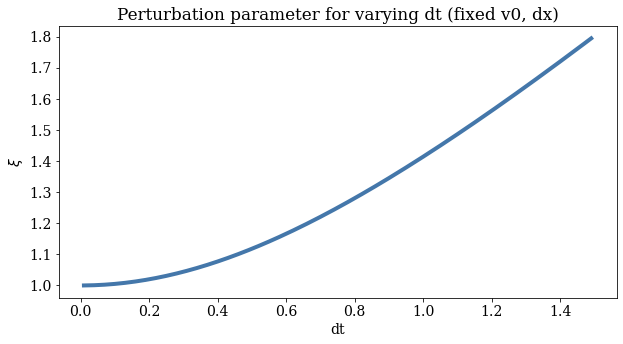

In [159]:
plt.rc('font', family='serif',size=14);
fig, ax1=plt.subplots(figsize=(10, 5));
ax1.plot(dt,xis,color=bright[0],linewidth=4);
ax1.set_title('Perturbation parameter for varying dt (fixed v0, dx)');
ax1.set_ylabel(r'${\xi}$');
ax1.set_xlabel('dt');

So we see that using this perturbation, the leapfrog method is unconditionally unstable. It is always unstable. This is perhaps wrong, but upon inspection of the equation used, we can immediately see analytically that it will never be less than 1. Perhaps I used the wrong equation, and was supposed to derive a different expression than the one we did in class.

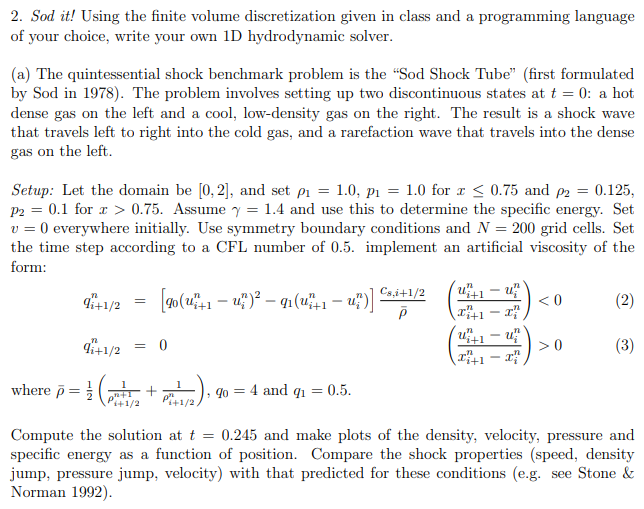

In [617]:
##Initial condition setup 
#x and v are measured on the cell edges
x1 = np.linspace(0,2,200)
v1 = np.zeros(x1.size)
#rho and p are measured at cell center, so x.size-1
rho1 = np.array([1 if i <= 0.75 else 0.125 for i in x1[:-1]])
P1 = np.array([1 if i <= 0.75 else 0.1 for i in x1[:-1]])
#the initial mass. initial mass is calculated at cell center, but then we calculate the midpoint, which is the edges
#so starts as the same size as rho
dmhalf = 2*rho1/(rho1.size)
dm = 1/2*(dmhalf[:-1]+dmhalf[1:])
#but this is now two cells too small, as we need it to be the same size as x, so we will pad the edges of the array
dm = np.pad(dm,1,'edge')
#initial energy and sounds speed. calculated at cell centers
gamma = 1.4
e1 = P1/(rho1 * (gamma - 1))
cs1 = np.sqrt(gamma*(P1/rho1))
#for our time step we need to determine using the CFL number of 0.5, as the prompt states
C = 0.5
#initial viscosity set to zero
q1 = np.zeros(rho1.size)
#constants for viscosity calculation later
qconst0 = 4
qconst1 = 0.5

Thanks to Kaelee for some advice she offered in making sure to have the correct length arrays for some of these values and thanks to Erica for helping me find more efficient ways in Python to initialize these variables. My first attempt was almost twice as many lines of code just to initialize these parameters

In [618]:
t = 0
dt = 0.0001 #small, nonzero dt to start us off.
T = 0.245 #final time to stop at
v1[0],v1[-1] = 0,0
while t < T:
    #To keep track of things, I'm using 1 for old values and 2 for new, then updating
    #before looping again. This adds extra lines of code, but makes my brain work better
    #applying boundary conditions for velocity
    dv1 = v1[1:]-v1[:-1]
    dq1 = q1[1:]-q1[:-1]
    dq1 = np.pad(dq1,1,'edge')
    dx1 = x1[1:]-x1[:-1]
    dP1 = P1[1:]-P1[:-1]
    dP1 = np.pad(dP1,1,'edge')
    #compute the new velocities (size 200)
    v2 = v1 - dt*(dP1 + dq1) / dm
    dv2 = v2[1:]-v2[:-1]
    #new positions (size 200)
    x2 = x1 + dt*v2
    dx2 = x2[1:]-x2[:-1]
    #new densities (size 199)
    rho2 = dmhalf / (dx2)
    #sound speed is lagged, so keep as "old" (size 199)
    cs1 = np.sqrt(gamma*(P1/rho1))
    #new artificial viscosity, lagged (size 199)
    rhobar = 1/2*(1/rho2+1/rho1)
    q2 = np.where(dv2/dx2 < 0, (qconst0*(dv2)**2-qconst1*(dv2))*(cs1/rhobar), 0)
    #new energies, note here we still use old viscosity  (size 199)
    e2 = e1 - (P1+q1)*(1/rho2-1/rho1)
    #new pressures (size 199)
    P2 = e2 * rho2 * (gamma-1)
    #now we update all "old" values to be the "new values"
    v1,x1,rho1,q1,e1,P1 = v2,x2,rho2,q2,e2,P2
    t = t + dt
    #new timestep to be used for next iteration
    dt = np.min(C*(dx1/(cs1+np.abs(v1[1:])))) 

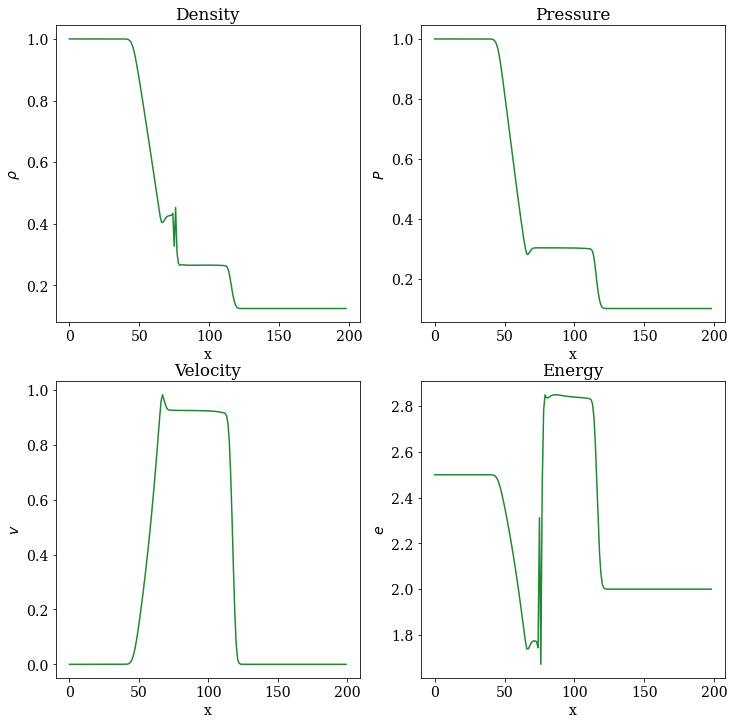

In [620]:
plt.rc('font', family='serif',size=14);
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(12,12));
ax1.plot(rho1,color=bright[2],label='Density');
ax1.set_title('Density');
ax1.set_ylabel(r'${\rho}$');
ax1.set_xlabel('x');
ax2.plot(P1,color=bright[2],label='Pressure');
ax2.set_title('Pressure');
ax2.set_ylabel(r'$P$');
ax2.set_xlabel('x');
ax3.plot(v1,color=bright[2],label='Velocity');
ax3.set_title('Velocity');
ax3.set_ylabel(r'$v$');
ax3.set_xlabel('x');
ax4.plot(e1,color=bright[2],label='Energy');
ax4.set_title('Energy');
ax4.set_ylabel(r'$e$');
ax4.set_xlabel('x');

It looks mostly how we would expect, except for that weird wiggle in density. Using a larger initial dt, this wiggle becomes more extreme. This was about as small as I could get it, even setting dt to zero initially (which I would not have expected to even function)

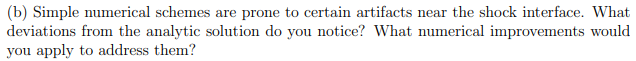

We see that some of the edges are not smooth or well behave at all. For example, the already discussed wiggle in density. There is also a weird bump in the left side of the "top hat" for the velocity. It could be that more finely sampling the shock tube would produce better results, or applying a different condition for determining the timesteps dt.

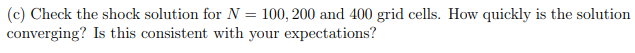

I could have turned my above code into a function to make this less gross, but will instead copy paste because the HW deadline is rapidly approaching!

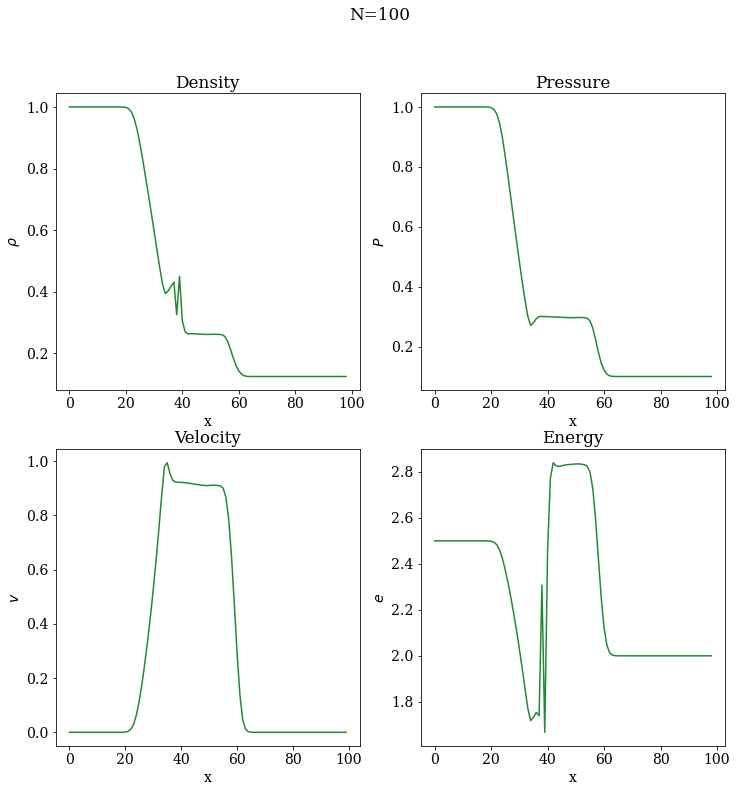

In [609]:
x1 = np.linspace(0,2,100)
v1 = np.zeros(x1.size)
#rho and p are measured at cell center, so x.size-1
rho1 = np.array([1 if i <= 0.75 else 0.125 for i in x1[:-1]])
P1 = np.array([1 if i <= 0.75 else 0.1 for i in x1[:-1]])
#the initial mass. initial mass is calculated at cell center, but then we calculate the midpoint, which is the edges
#so starts as the same size as rho
dmhalf = 2*rho1/(rho1.size)
dm = 1/2*(dmhalf[:-1]+dmhalf[1:])
#but this is now two cells too small, as we need it to be the same size as x, so we will pad the edges of the array
dm = np.pad(dm,1,'edge')
#initial energy and sounds speed. calculated at cell centers
gamma = 1.4
e1 = P1/(rho1 * (gamma - 1))
cs1 = np.sqrt(gamma*(P1/rho1))
#for our time step we need to determine using the CFL number of 0.5, as the prompt states
C = 0.5
#initial viscosity set to zero
q1 = np.zeros(rho1.size)
#constants for viscosity calculation later
qconst0 = 4
qconst1 = 0.5
t = 0
dt = 0.000 #small, nonzero dt to start us off.
T = 0.245 #final time to stop at
v1[0],v1[-1] = 0,0
while t < T:
    #To keep track of things, I'm using 1 for old values and 2 for new, then updating
    #before looping again. This adds extra lines of code, but makes my brain work better
    #applying boundary conditions for velocity
    dv1 = v1[1:]-v1[:-1]
    dq1 = q1[1:]-q1[:-1]
    dq1 = np.pad(dq1,1,'edge')
    dx1 = x1[1:]-x1[:-1]
    dP1 = P1[1:]-P1[:-1]
    dP1 = np.pad(dP1,1,'edge')
    #compute the new velocities (size 200)
    v2 = v1 - dt*(dP1 + dq1) / dm
    dv2 = v2[1:]-v2[:-1]
    #new positions (size 200)
    x2 = x1 + dt*v2
    dx2 = x2[1:]-x2[:-1]
    #new densities (size 199)
    rho2 = dmhalf / (dx2)
    #sound speed is lagged, so keep as "old" (size 199)
    cs1 = np.sqrt(gamma*(P1/rho1))
    #new artificial viscosity, lagged (size 199)
    rhobar = 1/2*(1/rho2+1/rho1)
    q2 = np.where(dv2/dx2 < 0, (qconst0*(dv2)**2-qconst1*(dv2))*(cs1/rhobar), 0)
    #new energies, note here we still use old viscosity  (size 199)
    e2 = e1 - (P1+q1)*(1/rho2-1/rho1)
    #new pressures (size 199)
    P2 = e2 * rho2 * (gamma-1)
    #now we update all "old" values to be the "new values"
    v1,x1,rho1,q1,e1,P1 = v2,x2,rho2,q2,e2,P2
    t = t + dt
    #new timestep to be used for next iteration
    dt = np.min(C*(dx1/(cs1+np.abs(v1[1:])))) 
plt.rc('font', family='serif',size=14);
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(12,12));
fig.suptitle('N=100')
ax1.plot(rho1,color=bright[2],label='Density');
ax1.set_title('Density');
ax1.set_ylabel(r'${\rho}$');
ax1.set_xlabel('x');
ax2.plot(P1,color=bright[2],label='Pressure');
ax2.set_title('Pressure');
ax2.set_ylabel(r'$P$');
ax2.set_xlabel('x');
ax3.plot(v1,color=bright[2],label='Velocity');
ax3.set_title('Velocity');
ax3.set_ylabel(r'$v$');
ax3.set_xlabel('x');
ax4.plot(e1,color=bright[2],label='Energy');
ax4.set_title('Energy');
ax4.set_ylabel(r'$e$');
ax4.set_xlabel('x');

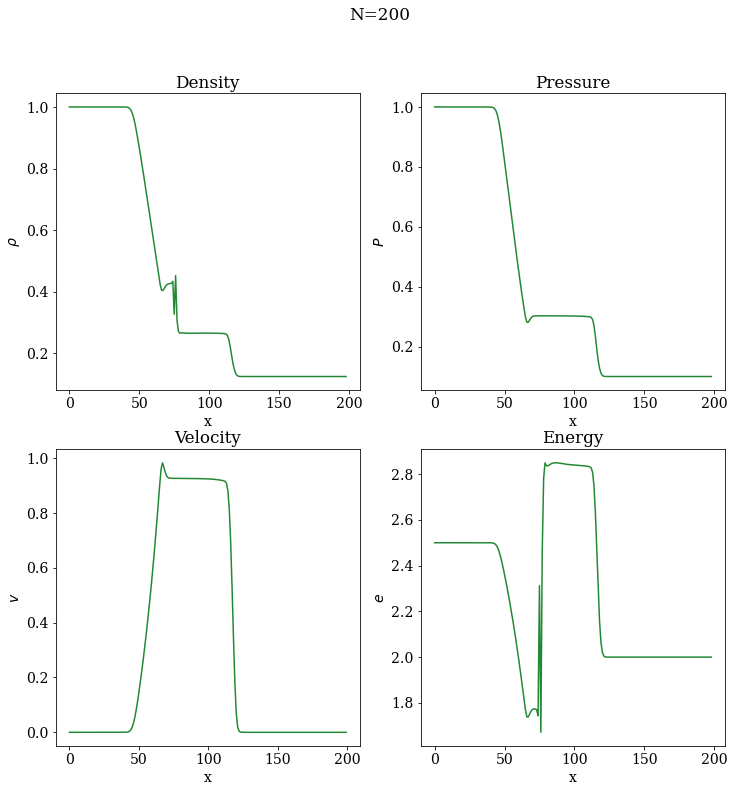

In [613]:
x1 = np.linspace(0,2,200)
v1 = np.zeros(x1.size)
#rho and p are measured at cell center, so x.size-1
rho1 = np.array([1 if i <= 0.75 else 0.125 for i in x1[:-1]])
P1 = np.array([1 if i <= 0.75 else 0.1 for i in x1[:-1]])
#the initial mass. initial mass is calculated at cell center, but then we calculate the midpoint, which is the edges
#so starts as the same size as rho
dmhalf = 2*rho1/(rho1.size)
dm = 1/2*(dmhalf[:-1]+dmhalf[1:])
#but this is now two cells too small, as we need it to be the same size as x, so we will pad the edges of the array
dm = np.pad(dm,1,'edge')
#initial energy and sounds speed. calculated at cell centers
gamma = 1.4
e1 = P1/(rho1 * (gamma - 1))
cs1 = np.sqrt(gamma*(P1/rho1))
#for our time step we need to determine using the CFL number of 0.5, as the prompt states
C = 0.5
#initial viscosity set to zero
q1 = np.zeros(rho1.size)
#constants for viscosity calculation later
qconst0 = 4
qconst1 = 0.5
t = 0
dt = 0.000 #small, nonzero dt to start us off.
T = 0.245 #final time to stop at
v1[0],v1[-1] = 0,0
while t < T:
    #To keep track of things, I'm using 1 for old values and 2 for new, then updating
    #before looping again. This adds extra lines of code, but makes my brain work better
    #applying boundary conditions for velocity
    dv1 = v1[1:]-v1[:-1]
    dq1 = q1[1:]-q1[:-1]
    dq1 = np.pad(dq1,1,'edge')
    dx1 = x1[1:]-x1[:-1]
    dP1 = P1[1:]-P1[:-1]
    dP1 = np.pad(dP1,1,'edge')
    #compute the new velocities (size 200)
    v2 = v1 - dt*(dP1 + dq1) / dm
    dv2 = v2[1:]-v2[:-1]
    #new positions (size 200)
    x2 = x1 + dt*v2
    dx2 = x2[1:]-x2[:-1]
    #new densities (size 199)
    rho2 = dmhalf / (dx2)
    #sound speed is lagged, so keep as "old" (size 199)
    cs1 = np.sqrt(gamma*(P1/rho1))
    #new artificial viscosity, lagged (size 199)
    rhobar = 1/2*(1/rho2+1/rho1)
    q2 = np.where(dv2/dx2 < 0, (qconst0*(dv2)**2-qconst1*(dv2))*(cs1/rhobar), 0)
    #new energies, note here we still use old viscosity  (size 199)
    e2 = e1 - (P1+q1)*(1/rho2-1/rho1)
    #new pressures (size 199)
    P2 = e2 * rho2 * (gamma-1)
    #now we update all "old" values to be the "new values"
    v1,x1,rho1,q1,e1,P1 = v2,x2,rho2,q2,e2,P2
    t = t + dt
    #new timestep to be used for next iteration
    dt = np.min(C*(dx1/(cs1+np.abs(v1[1:])))) 
plt.rc('font', family='serif',size=14);
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(12,12));
fig.suptitle('N=200')
ax1.plot(rho1,color=bright[2],label='Density');
ax1.set_title('Density');
ax1.set_ylabel(r'${\rho}$');
ax1.set_xlabel('x');
ax2.plot(P1,color=bright[2],label='Pressure');
ax2.set_title('Pressure');
ax2.set_ylabel(r'$P$');
ax2.set_xlabel('x');
ax3.plot(v1,color=bright[2],label='Velocity');
ax3.set_title('Velocity');
ax3.set_ylabel(r'$v$');
ax3.set_xlabel('x');
ax4.plot(e1,color=bright[2],label='Energy');
ax4.set_title('Energy');
ax4.set_ylabel(r'$e$');
ax4.set_xlabel('x');

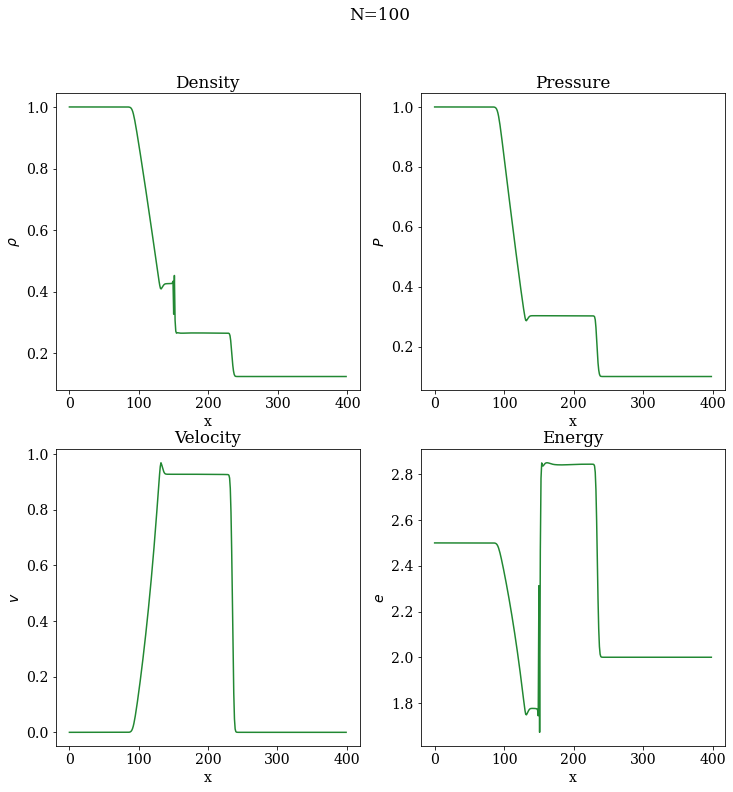

In [612]:
x1 = np.linspace(0,2,400)
v1 = np.zeros(x1.size)
#rho and p are measured at cell center, so x.size-1
rho1 = np.array([1 if i <= 0.75 else 0.125 for i in x1[:-1]])
P1 = np.array([1 if i <= 0.75 else 0.1 for i in x1[:-1]])
#the initial mass. initial mass is calculated at cell center, but then we calculate the midpoint, which is the edges
#so starts as the same size as rho
dmhalf = 2*rho1/(rho1.size)
dm = 1/2*(dmhalf[:-1]+dmhalf[1:])
#but this is now two cells too small, as we need it to be the same size as x, so we will pad the edges of the array
dm = np.pad(dm,1,'edge')
#initial energy and sounds speed. calculated at cell centers
gamma = 1.4
e1 = P1/(rho1 * (gamma - 1))
cs1 = np.sqrt(gamma*(P1/rho1))
#for our time step we need to determine using the CFL number of 0.5, as the prompt states
C = 0.5
#initial viscosity set to zero
q1 = np.zeros(rho1.size)
#constants for viscosity calculation later
qconst0 = 4
qconst1 = 0.5
t = 0
dt = 0.000 #small, nonzero dt to start us off.
T = 0.245 #final time to stop at
v1[0],v1[-1] = 0,0
while t < T:
    #To keep track of things, I'm using 1 for old values and 2 for new, then updating
    #before looping again. This adds extra lines of code, but makes my brain work better
    #applying boundary conditions for velocity
    dv1 = v1[1:]-v1[:-1]
    dq1 = q1[1:]-q1[:-1]
    dq1 = np.pad(dq1,1,'edge')
    dx1 = x1[1:]-x1[:-1]
    dP1 = P1[1:]-P1[:-1]
    dP1 = np.pad(dP1,1,'edge')
    #compute the new velocities (size 200)
    v2 = v1 - dt*(dP1 + dq1) / dm
    dv2 = v2[1:]-v2[:-1]
    #new positions (size 200)
    x2 = x1 + dt*v2
    dx2 = x2[1:]-x2[:-1]
    #new densities (size 199)
    rho2 = dmhalf / (dx2)
    #sound speed is lagged, so keep as "old" (size 199)
    cs1 = np.sqrt(gamma*(P1/rho1))
    #new artificial viscosity, lagged (size 199)
    rhobar = 1/2*(1/rho2+1/rho1)
    q2 = np.where(dv2/dx2 < 0, (qconst0*(dv2)**2-qconst1*(dv2))*(cs1/rhobar), 0)
    #new energies, note here we still use old viscosity  (size 199)
    e2 = e1 - (P1+q1)*(1/rho2-1/rho1)
    #new pressures (size 199)
    P2 = e2 * rho2 * (gamma-1)
    #now we update all "old" values to be the "new values"
    v1,x1,rho1,q1,e1,P1 = v2,x2,rho2,q2,e2,P2
    t = t + dt
    #new timestep to be used for next iteration
    dt = np.min(C*(dx1/(cs1+np.abs(v1[1:])))) 
plt.rc('font', family='serif',size=14);
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(12,12));
fig.suptitle('N=400')
ax1.plot(rho1,color=bright[2],label='Density');
ax1.set_title('Density');
ax1.set_ylabel(r'${\rho}$');
ax1.set_xlabel('x');
ax2.plot(P1,color=bright[2],label='Pressure');
ax2.set_title('Pressure');
ax2.set_ylabel(r'$P$');
ax2.set_xlabel('x');
ax3.plot(v1,color=bright[2],label='Velocity');
ax3.set_title('Velocity');
ax3.set_ylabel(r'$v$');
ax3.set_xlabel('x');
ax4.plot(e1,color=bright[2],label='Energy');
ax4.set_title('Energy');
ax4.set_ylabel(r'$e$');
ax4.set_xlabel('x');

This seems to function how I expected, and we see that these weird artifacts in my solution are lessened for the larger sampled grid. However, the artifacts don't really go away. This may be some error in how I've set up the algorithm. I will say this method is shockingly efficient. This simulation runs very rapidly, less than a second.

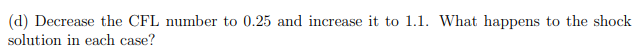

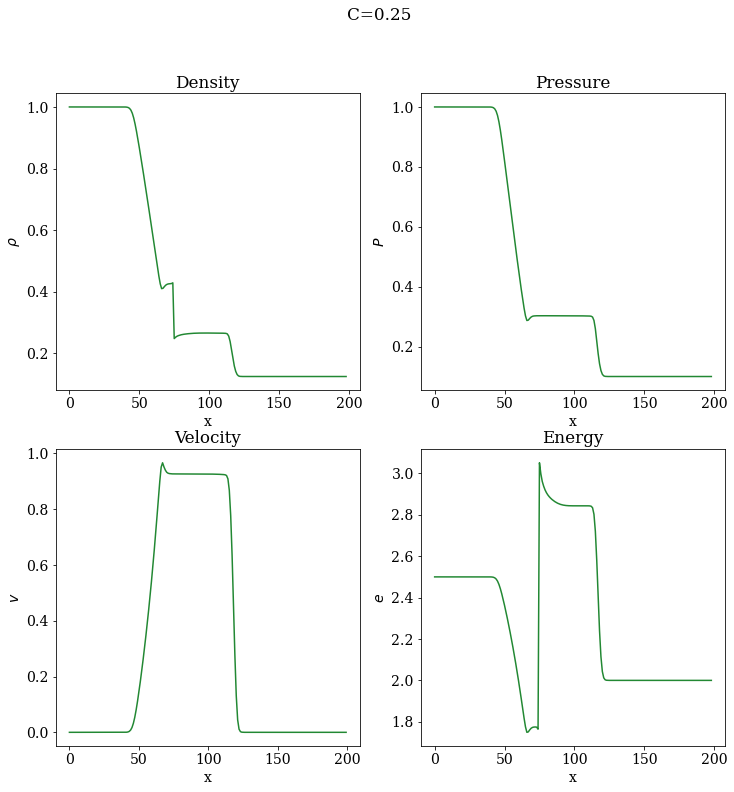

In [614]:
x1 = np.linspace(0,2,200)
v1 = np.zeros(x1.size)
#rho and p are measured at cell center, so x.size-1
rho1 = np.array([1 if i <= 0.75 else 0.125 for i in x1[:-1]])
P1 = np.array([1 if i <= 0.75 else 0.1 for i in x1[:-1]])
#the initial mass. initial mass is calculated at cell center, but then we calculate the midpoint, which is the edges
#so starts as the same size as rho
dmhalf = 2*rho1/(rho1.size)
dm = 1/2*(dmhalf[:-1]+dmhalf[1:])
#but this is now two cells too small, as we need it to be the same size as x, so we will pad the edges of the array
dm = np.pad(dm,1,'edge')
#initial energy and sounds speed. calculated at cell centers
gamma = 1.4
e1 = P1/(rho1 * (gamma - 1))
cs1 = np.sqrt(gamma*(P1/rho1))
#for our time step we need to determine using the CFL number of 0.5, as the prompt states
C = 0.25
#initial viscosity set to zero
q1 = np.zeros(rho1.size)
#constants for viscosity calculation later
qconst0 = 4
qconst1 = 0.5
t = 0
dt = 0.000 #small, nonzero dt to start us off.
T = 0.245 #final time to stop at
v1[0],v1[-1] = 0,0
while t < T:
    #To keep track of things, I'm using 1 for old values and 2 for new, then updating
    #before looping again. This adds extra lines of code, but makes my brain work better
    #applying boundary conditions for velocity
    dv1 = v1[1:]-v1[:-1]
    dq1 = q1[1:]-q1[:-1]
    dq1 = np.pad(dq1,1,'edge')
    dx1 = x1[1:]-x1[:-1]
    dP1 = P1[1:]-P1[:-1]
    dP1 = np.pad(dP1,1,'edge')
    #compute the new velocities (size 200)
    v2 = v1 - dt*(dP1 + dq1) / dm
    dv2 = v2[1:]-v2[:-1]
    #new positions (size 200)
    x2 = x1 + dt*v2
    dx2 = x2[1:]-x2[:-1]
    #new densities (size 199)
    rho2 = dmhalf / (dx2)
    #sound speed is lagged, so keep as "old" (size 199)
    cs1 = np.sqrt(gamma*(P1/rho1))
    #new artificial viscosity, lagged (size 199)
    rhobar = 1/2*(1/rho2+1/rho1)
    q2 = np.where(dv2/dx2 < 0, (qconst0*(dv2)**2-qconst1*(dv2))*(cs1/rhobar), 0)
    #new energies, note here we still use old viscosity  (size 199)
    e2 = e1 - (P1+q1)*(1/rho2-1/rho1)
    #new pressures (size 199)
    P2 = e2 * rho2 * (gamma-1)
    #now we update all "old" values to be the "new values"
    v1,x1,rho1,q1,e1,P1 = v2,x2,rho2,q2,e2,P2
    t = t + dt
    #new timestep to be used for next iteration
    dt = np.min(C*(dx1/(cs1+np.abs(v1[1:])))) 
plt.rc('font', family='serif',size=14);
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(12,12));
fig.suptitle('C=0.25')
ax1.plot(rho1,color=bright[2],label='Density');
ax1.set_title('Density');
ax1.set_ylabel(r'${\rho}$');
ax1.set_xlabel('x');
ax2.plot(P1,color=bright[2],label='Pressure');
ax2.set_title('Pressure');
ax2.set_ylabel(r'$P$');
ax2.set_xlabel('x');
ax3.plot(v1,color=bright[2],label='Velocity');
ax3.set_title('Velocity');
ax3.set_ylabel(r'$v$');
ax3.set_xlabel('x');
ax4.plot(e1,color=bright[2],label='Energy');
ax4.set_title('Energy');
ax4.set_ylabel(r'$e$');
ax4.set_xlabel('x');

<ipython-input-616-15e9ed17b989>:46: RuntimeWarning: invalid value encountered in sqrt
  cs1 = np.sqrt(gamma*(P1/rho1))


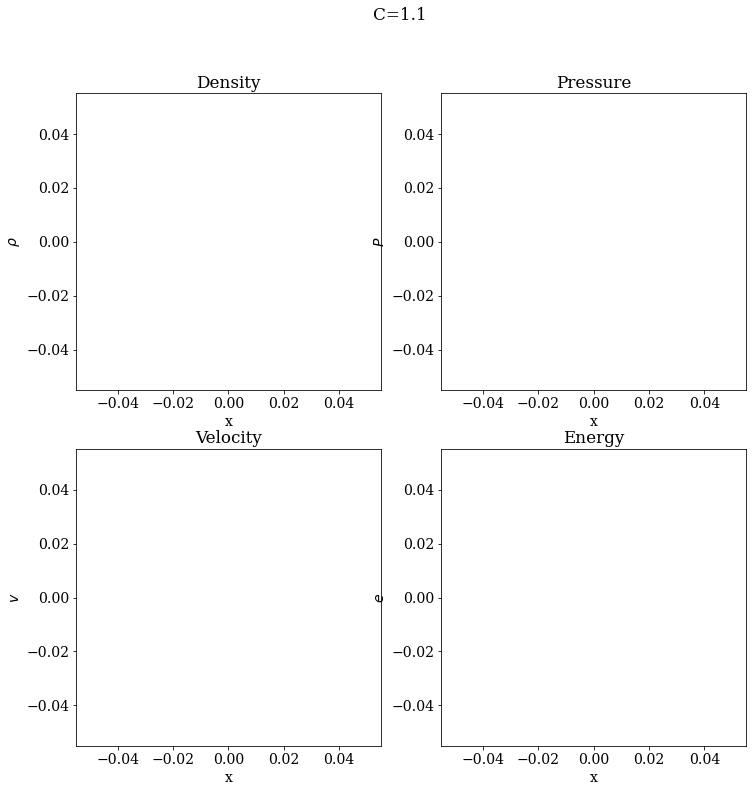

In [616]:
x1 = np.linspace(0,2,200)
v1 = np.zeros(x1.size)
#rho and p are measured at cell center, so x.size-1
rho1 = np.array([1 if i <= 0.75 else 0.125 for i in x1[:-1]])
P1 = np.array([1 if i <= 0.75 else 0.1 for i in x1[:-1]])
#the initial mass. initial mass is calculated at cell center, but then we calculate the midpoint, which is the edges
#so starts as the same size as rho
dmhalf = 2*rho1/(rho1.size)
dm = 1/2*(dmhalf[:-1]+dmhalf[1:])
#but this is now two cells too small, as we need it to be the same size as x, so we will pad the edges of the array
dm = np.pad(dm,1,'edge')
#initial energy and sounds speed. calculated at cell centers
gamma = 1.4
e1 = P1/(rho1 * (gamma - 1))
cs1 = np.sqrt(gamma*(P1/rho1))
#for our time step we need to determine using the CFL number of 0.5, as the prompt states
C = 1.1
#initial viscosity set to zero
q1 = np.zeros(rho1.size)
#constants for viscosity calculation later
qconst0 = 4
qconst1 = 0.5
t = 0
dt = 0.000 #small, nonzero dt to start us off.
T = 0.245 #final time to stop at
v1[0],v1[-1] = 0,0
while t < T:
    #To keep track of things, I'm using 1 for old values and 2 for new, then updating
    #before looping again. This adds extra lines of code, but makes my brain work better
    #applying boundary conditions for velocity
    dv1 = v1[1:]-v1[:-1]
    dq1 = q1[1:]-q1[:-1]
    dq1 = np.pad(dq1,1,'edge')
    dx1 = x1[1:]-x1[:-1]
    dP1 = P1[1:]-P1[:-1]
    dP1 = np.pad(dP1,1,'edge')
    #compute the new velocities (size 200)
    v2 = v1 - dt*(dP1 + dq1) / dm
    dv2 = v2[1:]-v2[:-1]
    #new positions (size 200)
    x2 = x1 + dt*v2
    dx2 = x2[1:]-x2[:-1]
    #new densities (size 199)
    rho2 = dmhalf / (dx2)
    #sound speed is lagged, so keep as "old" (size 199)
    cs1 = np.sqrt(gamma*(P1/rho1))
    #new artificial viscosity, lagged (size 199)
    rhobar = 1/2*(1/rho2+1/rho1)
    q2 = np.where(dv2/dx2 < 0, (qconst0*(dv2)**2-qconst1*(dv2))*(cs1/rhobar), 0)
    #new energies, note here we still use old viscosity  (size 199)
    e2 = e1 - (P1+q1)*(1/rho2-1/rho1)
    #new pressures (size 199)
    P2 = e2 * rho2 * (gamma-1)
    #now we update all "old" values to be the "new values"
    v1,x1,rho1,q1,e1,P1 = v2,x2,rho2,q2,e2,P2
    t = t + dt
    #new timestep to be used for next iteration
    dt = np.min(C*(dx1/(cs1+np.abs(v1[1:])))) 
plt.rc('font', family='serif',size=14);
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(12,12));
fig.suptitle('C=1.1')
ax1.plot(rho1,color=bright[2],label='Density');
ax1.set_title('Density');
ax1.set_ylabel(r'${\rho}$');
ax1.set_xlabel('x');
ax2.plot(P1,color=bright[2],label='Pressure');
ax2.set_title('Pressure');
ax2.set_ylabel(r'$P$');
ax2.set_xlabel('x');
ax3.plot(v1,color=bright[2],label='Velocity');
ax3.set_title('Velocity');
ax3.set_ylabel(r'$v$');
ax3.set_xlabel('x');
ax4.plot(e1,color=bright[2],label='Energy');
ax4.set_title('Energy');
ax4.set_ylabel(r'$e$');
ax4.set_xlabel('x');

For the smaller CFL, the weird artifacts in my solution seem to improve. I think this is because the timestep is smaller for this new CFL number. I also reckon the way that my CFL condition is behaving in the original solution with C = 0.5 is the culprit behind the weird artifacts. 

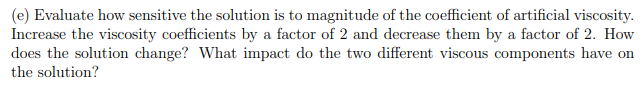

<ipython-input-623-42c22cf29336>:46: RuntimeWarning: invalid value encountered in sqrt
  cs1 = np.sqrt(gamma*(P1/rho1))


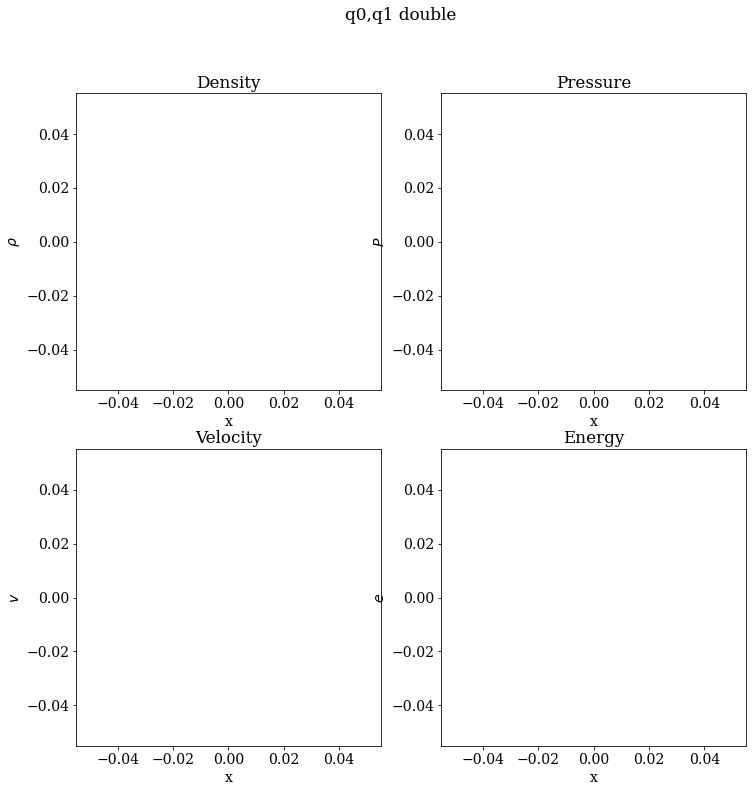

In [623]:
x1 = np.linspace(0,2,200)
v1 = np.zeros(x1.size)
#rho and p are measured at cell center, so x.size-1
rho1 = np.array([1 if i <= 0.75 else 0.125 for i in x1[:-1]])
P1 = np.array([1 if i <= 0.75 else 0.1 for i in x1[:-1]])
#the initial mass. initial mass is calculated at cell center, but then we calculate the midpoint, which is the edges
#so starts as the same size as rho
dmhalf = 2*rho1/(rho1.size)
dm = 1/2*(dmhalf[:-1]+dmhalf[1:])
#but this is now two cells too small, as we need it to be the same size as x, so we will pad the edges of the array
dm = np.pad(dm,1,'edge')
#initial energy and sounds speed. calculated at cell centers
gamma = 1.4
e1 = P1/(rho1 * (gamma - 1))
cs1 = np.sqrt(gamma*(P1/rho1))
#for our time step we need to determine using the CFL number of 0.5, as the prompt states
C = 0.5
#initial viscosity set to zero
q1 = np.zeros(rho1.size)
#constants for viscosity calculation later
qconst0 = 2*4
qconst1 = 2*0.5
t = 0
dt = 0.0001 #small, nonzero dt to start us off.
T = 0.245 #final time to stop at
v1[0],v1[-1] = 0,0
while t < T:
    #To keep track of things, I'm using 1 for old values and 2 for new, then updating
    #before looping again. This adds extra lines of code, but makes my brain work better
    #applying boundary conditions for velocity
    dv1 = v1[1:]-v1[:-1]
    dq1 = q1[1:]-q1[:-1]
    dq1 = np.pad(dq1,1,'edge')
    dx1 = x1[1:]-x1[:-1]
    dP1 = P1[1:]-P1[:-1]
    dP1 = np.pad(dP1,1,'edge')
    #compute the new velocities (size 200)
    v2 = v1 - dt*(dP1 + dq1) / dm
    dv2 = v2[1:]-v2[:-1]
    #new positions (size 200)
    x2 = x1 + dt*v2
    dx2 = x2[1:]-x2[:-1]
    #new densities (size 199)
    rho2 = dmhalf / (dx2)
    #sound speed is lagged, so keep as "old" (size 199)
    cs1 = np.sqrt(gamma*(P1/rho1))
    #new artificial viscosity, lagged (size 199)
    rhobar = 1/2*(1/rho2+1/rho1)
    q2 = np.where(dv2/dx2 < 0, (qconst0*(dv2)**2-qconst1*(dv2))*(cs1/rhobar), 0)
    #new energies, note here we still use old viscosity  (size 199)
    e2 = e1 - (P1+q1)*(1/rho2-1/rho1)
    #new pressures (size 199)
    P2 = e2 * rho2 * (gamma-1)
    #now we update all "old" values to be the "new values"
    v1,x1,rho1,q1,e1,P1 = v2,x2,rho2,q2,e2,P2
    t = t + dt
    #new timestep to be used for next iteration
    dt = np.min(C*(dx1/(cs1+np.abs(v1[1:])))) 
plt.rc('font', family='serif',size=14);
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(12,12));
fig.suptitle('q0,q1 double')
ax1.plot(rho1,color=bright[2],label='Density');
ax1.set_title('Density');
ax1.set_ylabel(r'${\rho}$');
ax1.set_xlabel('x');
ax2.plot(P1,color=bright[2],label='Pressure');
ax2.set_title('Pressure');
ax2.set_ylabel(r'$P$');
ax2.set_xlabel('x');
ax3.plot(v1,color=bright[2],label='Velocity');
ax3.set_title('Velocity');
ax3.set_ylabel(r'$v$');
ax3.set_xlabel('x');
ax4.plot(e1,color=bright[2],label='Energy');
ax4.set_title('Energy');
ax4.set_ylabel(r'$e$');
ax4.set_xlabel('x');

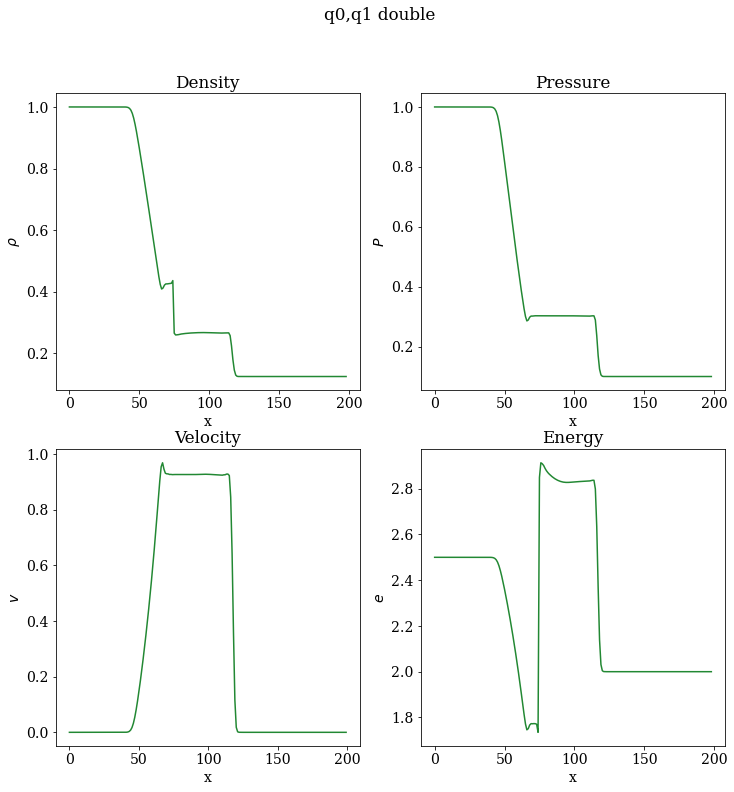

In [624]:
x1 = np.linspace(0,2,200)
v1 = np.zeros(x1.size)
#rho and p are measured at cell center, so x.size-1
rho1 = np.array([1 if i <= 0.75 else 0.125 for i in x1[:-1]])
P1 = np.array([1 if i <= 0.75 else 0.1 for i in x1[:-1]])
#the initial mass. initial mass is calculated at cell center, but then we calculate the midpoint, which is the edges
#so starts as the same size as rho
dmhalf = 2*rho1/(rho1.size)
dm = 1/2*(dmhalf[:-1]+dmhalf[1:])
#but this is now two cells too small, as we need it to be the same size as x, so we will pad the edges of the array
dm = np.pad(dm,1,'edge')
#initial energy and sounds speed. calculated at cell centers
gamma = 1.4
e1 = P1/(rho1 * (gamma - 1))
cs1 = np.sqrt(gamma*(P1/rho1))
#for our time step we need to determine using the CFL number of 0.5, as the prompt states
C = 0.5
#initial viscosity set to zero
q1 = np.zeros(rho1.size)
#constants for viscosity calculation later
qconst0 = 4/2
qconst1 = 0.5/2
t = 0
dt = 0.0001 #small, nonzero dt to start us off.
T = 0.245 #final time to stop at
v1[0],v1[-1] = 0,0
while t < T:
    #To keep track of things, I'm using 1 for old values and 2 for new, then updating
    #before looping again. This adds extra lines of code, but makes my brain work better
    #applying boundary conditions for velocity
    dv1 = v1[1:]-v1[:-1]
    dq1 = q1[1:]-q1[:-1]
    dq1 = np.pad(dq1,1,'edge')
    dx1 = x1[1:]-x1[:-1]
    dP1 = P1[1:]-P1[:-1]
    dP1 = np.pad(dP1,1,'edge')
    #compute the new velocities (size 200)
    v2 = v1 - dt*(dP1 + dq1) / dm
    dv2 = v2[1:]-v2[:-1]
    #new positions (size 200)
    x2 = x1 + dt*v2
    dx2 = x2[1:]-x2[:-1]
    #new densities (size 199)
    rho2 = dmhalf / (dx2)
    #sound speed is lagged, so keep as "old" (size 199)
    cs1 = np.sqrt(gamma*(P1/rho1))
    #new artificial viscosity, lagged (size 199)
    rhobar = 1/2*(1/rho2+1/rho1)
    q2 = np.where(dv2/dx2 < 0, (qconst0*(dv2)**2-qconst1*(dv2))*(cs1/rhobar), 0)
    #new energies, note here we still use old viscosity  (size 199)
    e2 = e1 - (P1+q1)*(1/rho2-1/rho1)
    #new pressures (size 199)
    P2 = e2 * rho2 * (gamma-1)
    #now we update all "old" values to be the "new values"
    v1,x1,rho1,q1,e1,P1 = v2,x2,rho2,q2,e2,P2
    t = t + dt
    #new timestep to be used for next iteration
    dt = np.min(C*(dx1/(cs1+np.abs(v1[1:])))) 
plt.rc('font', family='serif',size=14);
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(12,12));
fig.suptitle('q0,q1 double')
ax1.plot(rho1,color=bright[2],label='Density');
ax1.set_title('Density');
ax1.set_ylabel(r'${\rho}$');
ax1.set_xlabel('x');
ax2.plot(P1,color=bright[2],label='Pressure');
ax2.set_title('Pressure');
ax2.set_ylabel(r'$P$');
ax2.set_xlabel('x');
ax3.plot(v1,color=bright[2],label='Velocity');
ax3.set_title('Velocity');
ax3.set_ylabel(r'$v$');
ax3.set_xlabel('x');
ax4.plot(e1,color=bright[2],label='Energy');
ax4.set_title('Energy');
ax4.set_ylabel(r'$e$');
ax4.set_xlabel('x');

We see for the large viscosity coefficients, my code breaks and will not function properly. For the reduced coefficients, it actually performs better. The artifacts are reduced. For curiosity sake, I'm now going to do one final run, combining these improvements to see if I can improve my solution. We'll use the smaller viscosity coefficients, N = 400, and C = .25

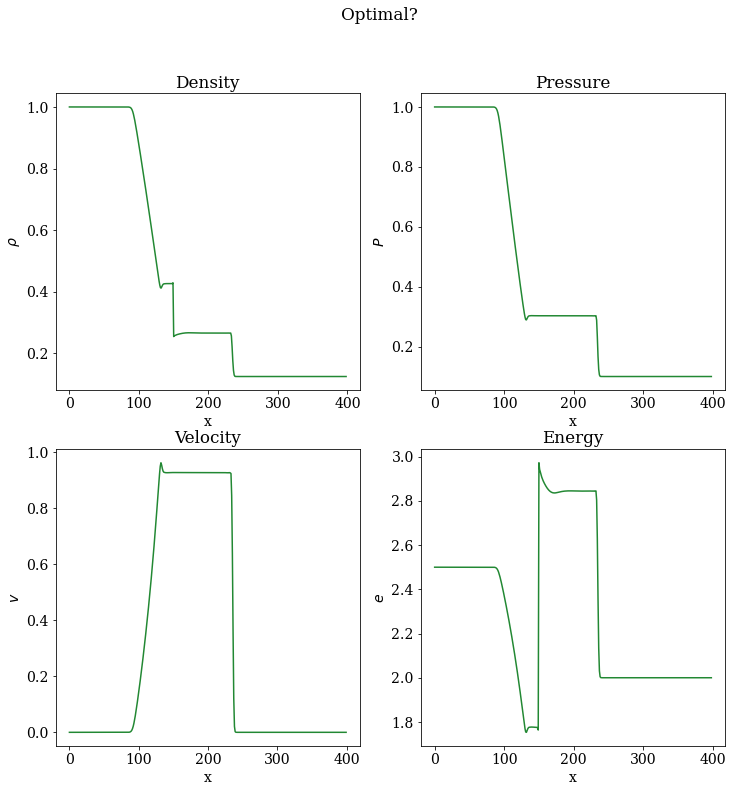

In [626]:
x1 = np.linspace(0,2,400)
v1 = np.zeros(x1.size)
#rho and p are measured at cell center, so x.size-1
rho1 = np.array([1 if i <= 0.75 else 0.125 for i in x1[:-1]])
P1 = np.array([1 if i <= 0.75 else 0.1 for i in x1[:-1]])
#the initial mass. initial mass is calculated at cell center, but then we calculate the midpoint, which is the edges
#so starts as the same size as rho
dmhalf = 2*rho1/(rho1.size)
dm = 1/2*(dmhalf[:-1]+dmhalf[1:])
#but this is now two cells too small, as we need it to be the same size as x, so we will pad the edges of the array
dm = np.pad(dm,1,'edge')
#initial energy and sounds speed. calculated at cell centers
gamma = 1.4
e1 = P1/(rho1 * (gamma - 1))
cs1 = np.sqrt(gamma*(P1/rho1))
#for our time step we need to determine using the CFL number of 0.5, as the prompt states
C = 0.25
#initial viscosity set to zero
q1 = np.zeros(rho1.size)
#constants for viscosity calculation later
qconst0 = 4/2
qconst1 = 0.5/2
t = 0
dt = 0.0001 #small, nonzero dt to start us off.
T = 0.245 #final time to stop at
v1[0],v1[-1] = 0,0
while t < T:
    #To keep track of things, I'm using 1 for old values and 2 for new, then updating
    #before looping again. This adds extra lines of code, but makes my brain work better
    #applying boundary conditions for velocity
    dv1 = v1[1:]-v1[:-1]
    dq1 = q1[1:]-q1[:-1]
    dq1 = np.pad(dq1,1,'edge')
    dx1 = x1[1:]-x1[:-1]
    dP1 = P1[1:]-P1[:-1]
    dP1 = np.pad(dP1,1,'edge')
    #compute the new velocities (size 200)
    v2 = v1 - dt*(dP1 + dq1) / dm
    dv2 = v2[1:]-v2[:-1]
    #new positions (size 200)
    x2 = x1 + dt*v2
    dx2 = x2[1:]-x2[:-1]
    #new densities (size 199)
    rho2 = dmhalf / (dx2)
    #sound speed is lagged, so keep as "old" (size 199)
    cs1 = np.sqrt(gamma*(P1/rho1))
    #new artificial viscosity, lagged (size 199)
    rhobar = 1/2*(1/rho2+1/rho1)
    q2 = np.where(dv2/dx2 < 0, (qconst0*(dv2)**2-qconst1*(dv2))*(cs1/rhobar), 0)
    #new energies, note here we still use old viscosity  (size 199)
    e2 = e1 - (P1+q1)*(1/rho2-1/rho1)
    #new pressures (size 199)
    P2 = e2 * rho2 * (gamma-1)
    #now we update all "old" values to be the "new values"
    v1,x1,rho1,q1,e1,P1 = v2,x2,rho2,q2,e2,P2
    t = t + dt
    #new timestep to be used for next iteration
    dt = np.min(C*(dx1/(cs1+np.abs(v1[1:])))) 
plt.rc('font', family='serif',size=14);
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(12,12));
fig.suptitle('Optimal?')
ax1.plot(rho1,color=bright[2],label='Density');
ax1.set_title('Density');
ax1.set_ylabel(r'${\rho}$');
ax1.set_xlabel('x');
ax2.plot(P1,color=bright[2],label='Pressure');
ax2.set_title('Pressure');
ax2.set_ylabel(r'$P$');
ax2.set_xlabel('x');
ax3.plot(v1,color=bright[2],label='Velocity');
ax3.set_title('Velocity');
ax3.set_ylabel(r'$v$');
ax3.set_xlabel('x');
ax4.plot(e1,color=bright[2],label='Energy');
ax4.set_title('Energy');
ax4.set_ylabel(r'$e$');
ax4.set_xlabel('x');

Still not as great as I would hope, but alas, not all numerical solutions are optimal. Mine is clearly not.